## Ensemble Learning
#### Gavin Daves, Rice University
#### INDE 577, Dr. Randy Davila

In this notebook, we will utilize Ensemble Methods in Python and use the model(s) we create on the Spotify dataset.

In [45]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
from sklearn.model_selection import train_test_split

sns.set_theme()

In [46]:
# Loading the data

# Add the top-level directory to the system path
sys.path.append('../../')

# Load the data
import clean_data as sd

df = sd.get_df()

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

### Random Forest Regressor Application Background

Music can evoke many emotions. Despite the old saying "there's two types of songs in this world: pirate songs and love songs", all of us seem to understand that there is more flexibility. That being said, using ensemble learning, I want to attempt to predict the mood of a song (or *valence,* in this case) based on its audio data. I am choosing to utilize a random forest regressor to do so. 

In [47]:
# Build the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
               'instrumentalness', 'liveness']]
y = df['valence']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create the model
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)

# Train the model

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict the test set

y_pred = model.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 0.038874689885763924
R2 Score: 0.4419615908466197


### Regressor Error Analysis


The MSE of the model is near zero, meaning the model is performing well in minimizing errors. However, the R-squared score is less than .5, which is not a great score. This means that the model is not explaining a significant portion of the variance in the data. So, this model may not be the best for predicting the valence of a song if noise is wanted to be captured.

### Random Forest Classifier Background

Let's revisit the problem we addressed in the Neural Networks Notebook. We picked different genres: Bluegrass, Heavy Metal, Hip-Hop, and Alternative Rock, in hopes to be able to classify songs of these genres based on their audio statistics with accuracy. Let's utilize a Random Forest Classifier to see if we can do even better this time.

Accuracy: 0.9288343558282208
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       267
           1       0.96      0.95      0.96       220
           2       0.88      0.89      0.88       144
           3       0.88      0.89      0.88       184

    accuracy                           0.93       815
   macro avg       0.92      0.92      0.92       815
weighted avg       0.93      0.93      0.93       815



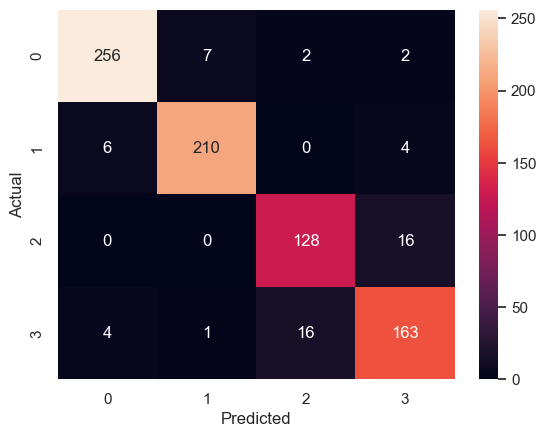

In [48]:
from sklearn.ensemble import RandomForestClassifier

bluegrass = df[df['track_genre'] == 'bluegrass']
heavy = df[df['track_genre'] == 'heavy-metal']
hiphop = df[df['track_genre'] == 'hip-hop']
altrock = df[df['track_genre'] == 'alt-rock']
comb = pd.concat([bluegrass, heavy, hiphop, altrock])

# Encode the track_genre column

comb['track_genre'] = comb['track_genre'].map({'bluegrass': 0, 'heavy-metal': 1, 
                                               'hip-hop': 2, 'alt-rock': 3})

X = comb[['danceability', 'energy', 'loudness', 'speechiness', 
          'acousticness','valence', 'explicit', 'tempo', 'popularity']]
y = comb['track_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

confusion_matrix = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d')
print(classification_report(y_test, y_pred))

### Classifier Error Analysis

As we see in the accuracy score, the model performed relatively well with an accuracy percent in the low 90s. The accuracy and "goodness" of the model is further affirmed in the classification report, where the f1-score for all of the genres is around or above .9. When looking at the confusion matrix, we see that there are some more misclassifications between alt-rock and hip-hop than other misclassifications, which I find quite interesting; as some of my favorite genres of music I consider these genres to be quite distinct. However, this implies that there may be some overlap between the genres, which would provide more reasoning as to why I like both of them. 

Ultimately, the metrics for accuracy and goodness of the model show that this is an excellent genre classifier.